In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_excel(r"C:\Users\ponug\Downloads\Changed Cardio train.xlsx")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72,135,80,1,2,0,0,0,1


In [3]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
df1=df.drop("height",axis=1)
df1

,id,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,62,110,80,1,1,0,0,1,0
1,1,20228,1,85,140,90,3,1,0,0,1,1
2,2,18857,1,64,130,70,3,1,0,0,0,1
3,3,17623,2,82,150,100,1,1,0,0,1,1
4,4,17474,1,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,76,120,80,1,1,1,0,1,0
69996,99995,22601,1,126,140,90,2,2,0,0,1,1
69997,99996,19066,2,105,180,90,3,1,0,1,0,1
69998,99998,22431,1,72,135,80,1,2,0,0,0,1


In [5]:
x=df1.iloc[:,1:11]
x

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,62,110,80,1,1,0,0,1
1,20228,1,85,140,90,3,1,0,0,1
2,18857,1,64,130,70,3,1,0,0,0
3,17623,2,82,150,100,1,1,0,0,1
4,17474,1,56,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,76,120,80,1,1,1,0,1
69996,22601,1,126,140,90,2,2,0,0,1
69997,19066,2,105,180,90,3,1,0,1,0
69998,22431,1,72,135,80,1,2,0,0,0


In [6]:
y=df1.iloc[:,11:]
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


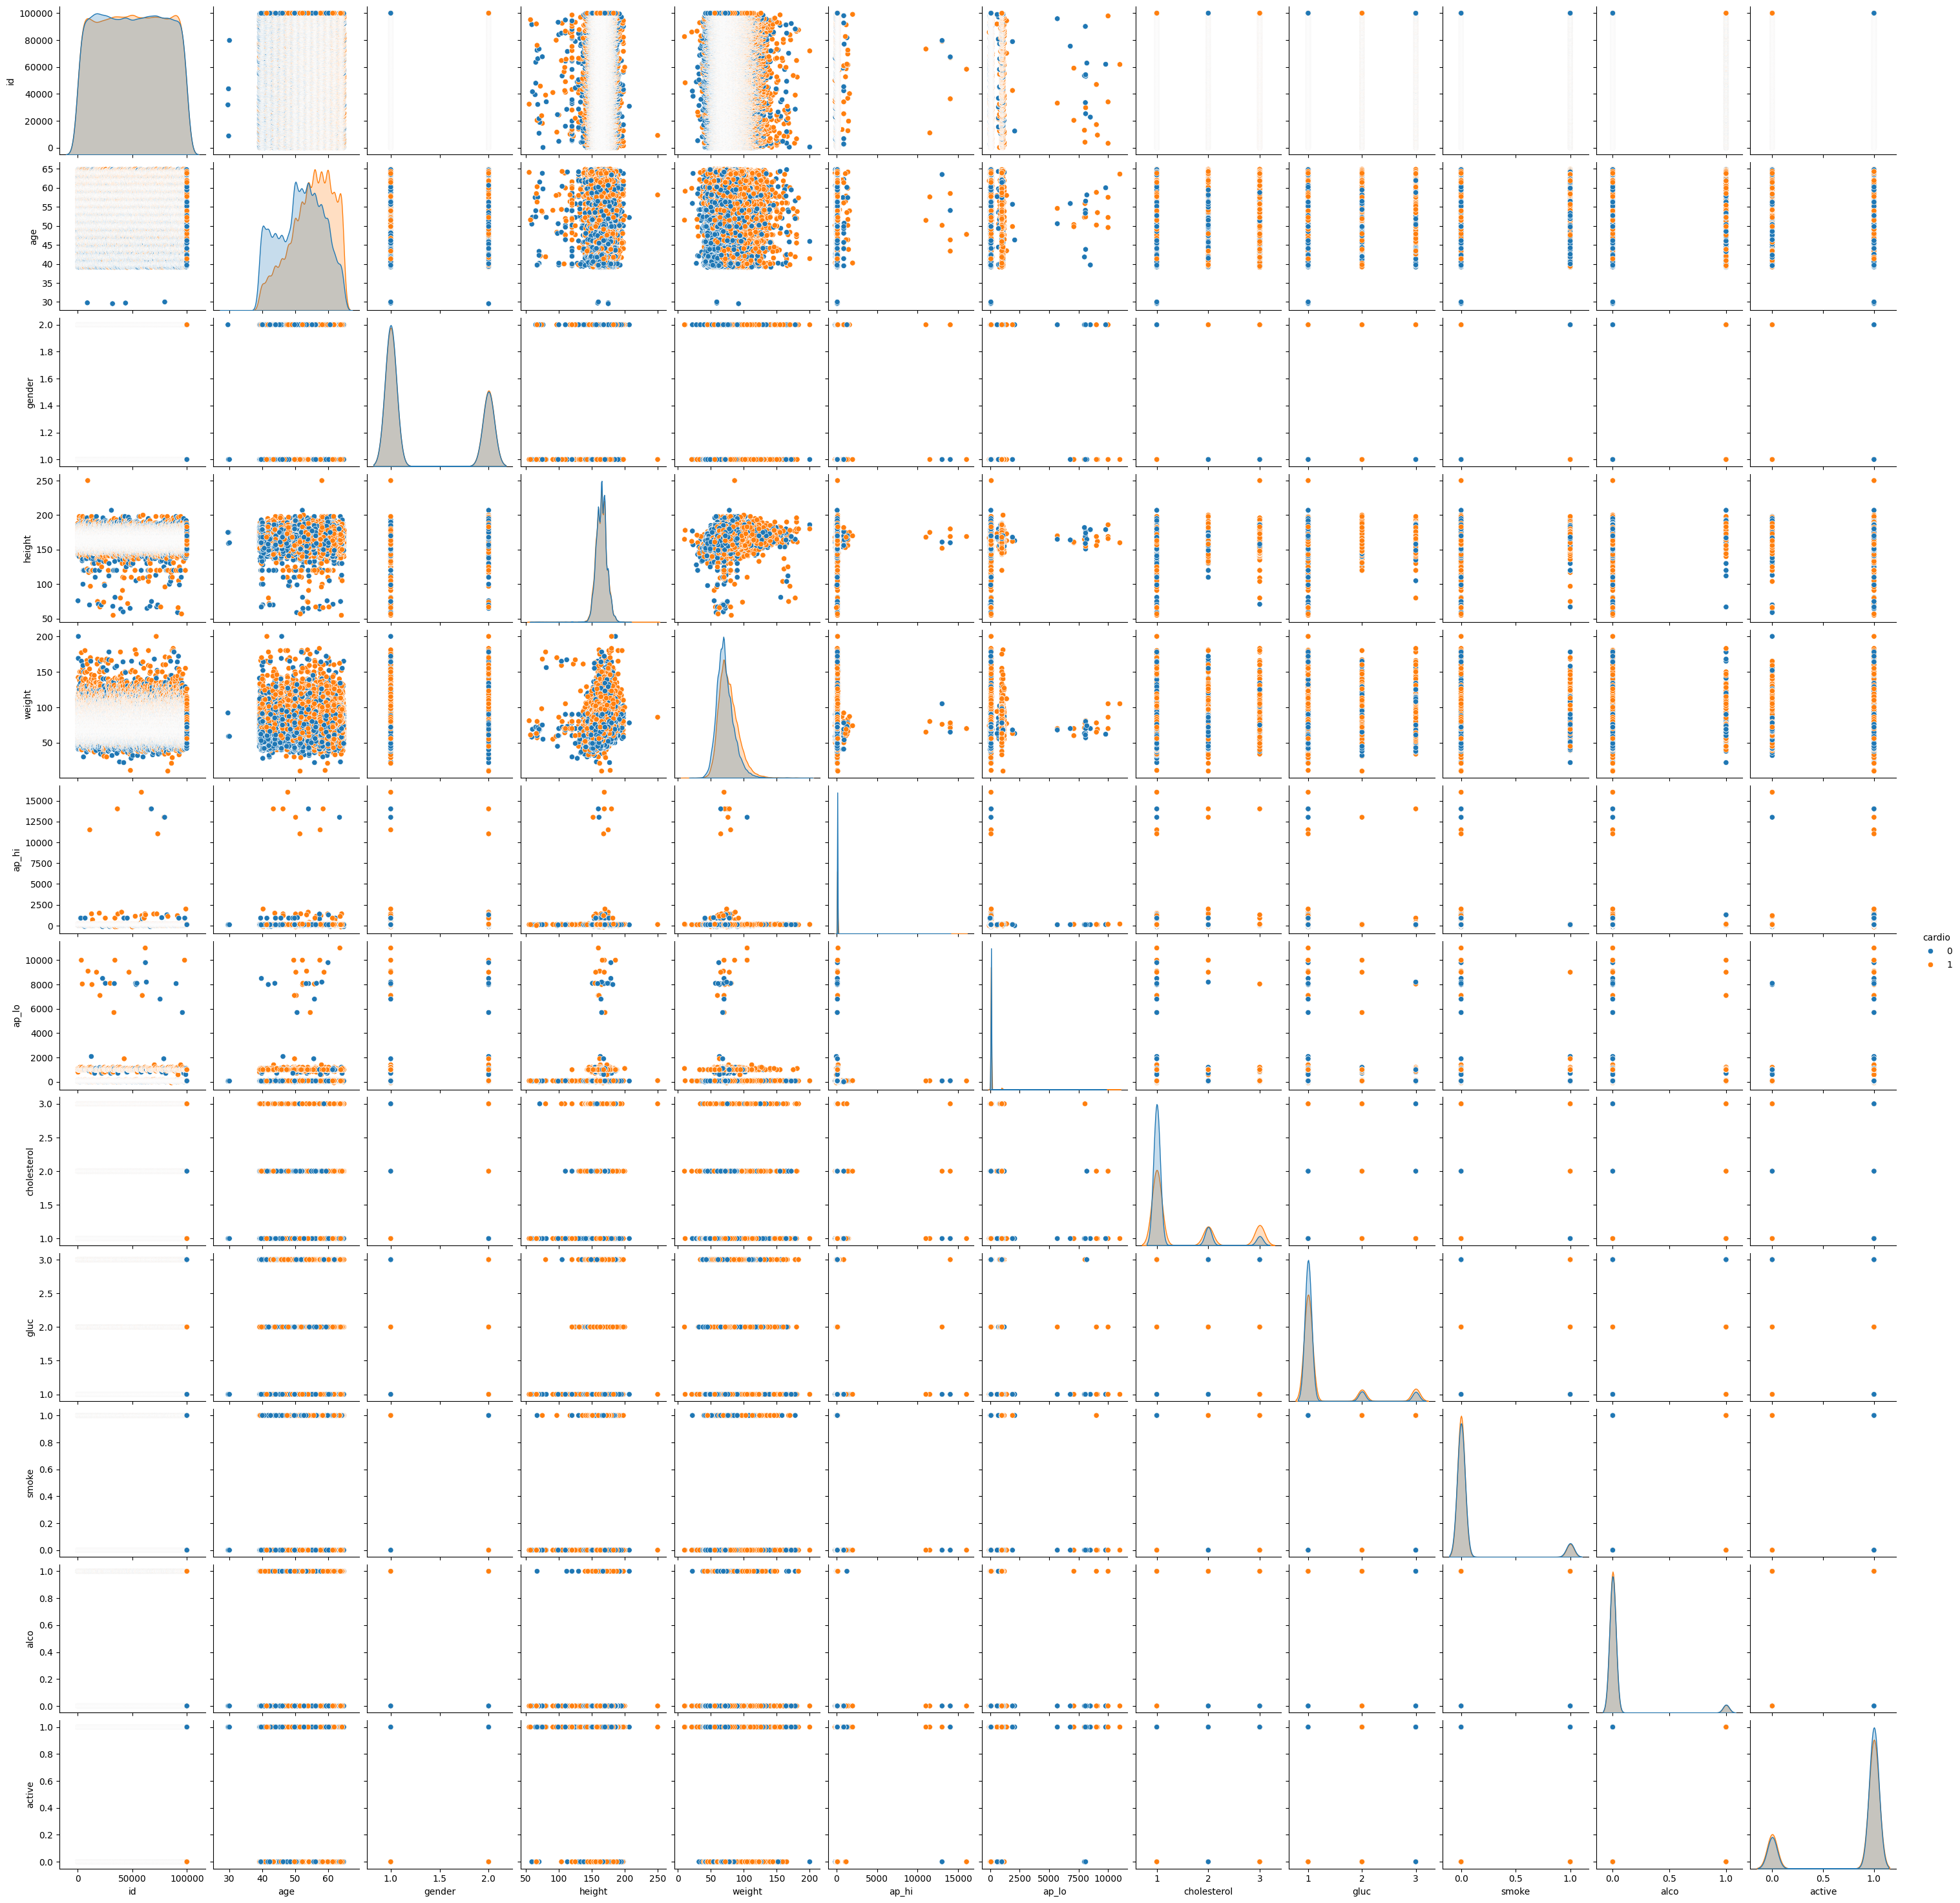

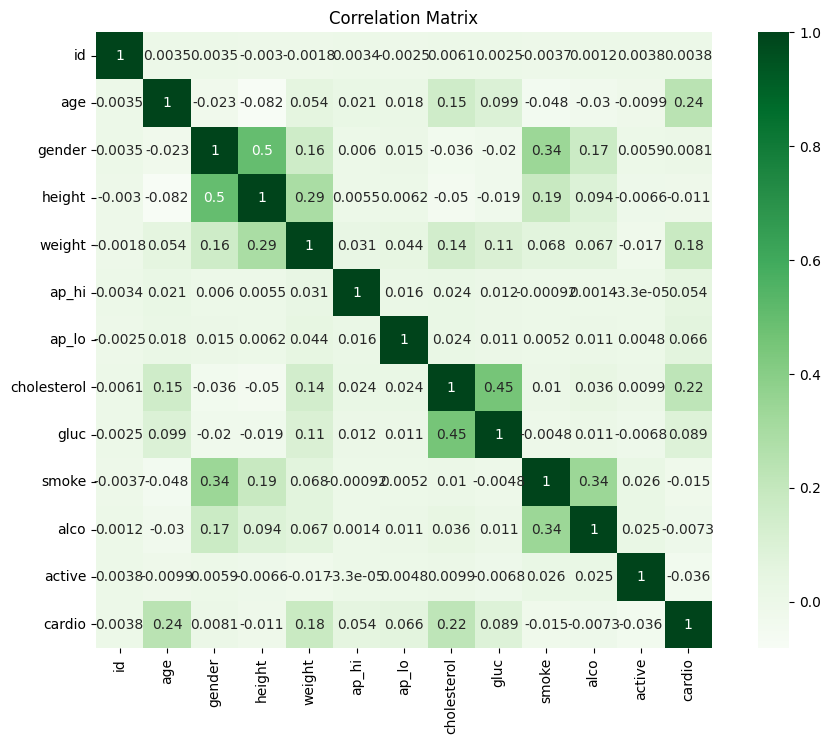

In [7]:
df['age'] = df['age'] / 365.25

# Data analysis and visualization
# Pairplot for visualizing relationships between variables
sns.pairplot(df, hue='cardio', diag_kind='kde')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='Greens', annot=True, square=True)
plt.title('Correlation Matrix')
plt.show()

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)

In [13]:
models=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
for i in range(5):
    models[i].fit(X_train_scaled,ytrain)
    print(f'{models[i]} : ')
    train_pred=models[i].predict(X_test_scaled)
    print("score is:",models[i].score(X_test_scaled,ytest))

LogisticRegression() : 
score is: 0.7225714285714285


C:\Users\ponug\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ponug\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier() : 
score is: 0.6970714285714286
DecisionTreeClassifier() : 
score is: 0.6437857142857143
KNeighborsClassifier() : 


C:\Users\ponug\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


score is: 0.6762857142857143


C:\Users\ponug\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC() : 
score is: 0.7290714285714286


In [14]:
classifiers=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
best_classifier=None
best_classifier_predictions=None
best_accuracy=None
for classifier in classifiers:
    classifier.fit(X_train_scaled,ytrain)
    predictions=classifier.predict(X_test_scaled)
    accuracy=classifier.score(X_test_scaled,ytest)
    if best_classifier is None or accuracy>best_accuracy:
        best_classifier=classifier
        best_accuracy=accuracy
if isinstance(best_classifier,RandomForestClassifier):
    rf_classifier=RandomForestClassifier()
    rf_classifier.fit(X_train_scaled,ytrain)
    best_classifier_predictions=rf_classifier.predict(X_test_scaled)
elif isinstance(best_classifier,LogisticRegression):
    lr_classifier=LogisticRegression()
    lr_classifier.fit(X_train_scaled,ytrain)
    best_classifier_predictions=lr_classifier.predict(X_test_scaled)
elif isinstance(best_classifier,KNeighborsClassifier):
    knn_classifier=KNeighborsClassifier()
    knn_classifier.fit(X_train_scaled,ytrain)
    best_classifier_predictions=knn_classifier.predict(X_test_scaled)
elif isinstance(best_classifier,SVC):
    svc_classifier=SVC()
    svc_classifier.fit(X_train_scaled,ytrain)
    best_classifier_predictions=svc_classifier.predict(X_test_scaled)
elif isinstance(best_classifier,DecisionTreeClassifier):
    dtc_classifier=DecisionTreeClassifier()
    dtc_classifier.fit(X_train_scaled,ytrain)
    best_classifier_predictions=dtc_classifier.predict(X_test_scaled)
print("Prediction based on the best classifier:",best_classifier,best_accuracy,best_classifier_predictions)

C:\Users\ponug\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ponug\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ponug\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ponug\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: Data

Prediction based on the best classifier: SVC() 0.7290714285714286 [0 0 1 ... 0 1 1]
